# **INTRODUCTION**
- Customer segmentation is a critical process for businesses aiming to understand and cater to diverse customer needs effectively. By analyzing customer demographics, purchasing behaviors, and preferences, organizations can divide their customer base into distinct segments. This segmentation enables businesses to implement targeted marketing strategies, improve customer satisfaction, and optimize product offerings.
The dataset in this project contains simulated customer data, including demographic attributes such as age, gender, and income, as well as behavioral traits like spending score, membership years, and purchase frequency. Through segmentation analysis, this project seeks to uncover meaningful customer groups and provide actionable insights that can enhance business strategies.



# **PROBLEM STATEMENT**
- In a competitive marketplace, businesses often struggle to address the unique needs of a diverse customer base. Generic strategies fail to resonate with all customers, leading to missed opportunities for engagement and revenue growth. Without a clear understanding of customer behavior and preferences, businesses risk misallocating resources, reducing customer loyalty, and losing market share.
This project aims to address these challenges by leveraging customer segmentation to identify distinct customer groups within the dataset. By understanding the characteristics and behaviors of each segment, businesses can design more effective marketing strategies, improve the customer experience, and ultimately drive sales growth.



# **OBJECTIVES**
- The goal of this project is to identify distinct customer groups based on demographic, behavioral, and preference data. This will enable personalized marketing, optimize resource allocation, enhance customer experiences, and drive sales growth. By providing actionable insights, the project aims to support strategic decision-making and develop a scalable framework for ongoing segmentation analysis.








# **1. LOADING THE NECESSARY LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. LOADING THE DATASET**

I got the dataset from [kaggle]( https://www.kaggle.com/datasets/fahmidachowdhury/customer-segmentation-data-for-marketing-analysis). This dataset contains simulated customer data that can be used for segmentation analysis. It includes demographic and behavioral information about customers, which can help in identifying distinct segments within the customer base. This can be particularly useful for targeted marketing strategies, improving customer satisfaction, and increasing sales.

**Columns:**

1. **id:** Unique identifier for each customer.

2. **age:** Age of the customer.

3. **gender:** Gender of the customer (Male, Female, Other).
4. **income:** Annual income of the customer (in USD).
5. **spending_score:** Spending score (1-100), indicating the 6. customer's spending behavior and loyalty.
6. **membership_years:** Number of years the customer has been a member.
7. **purchase_frequency:** Number of purchases made by the customer in the last year.
8. **preferred_category:** Preferred shopping category (Electronics, Clothing, Groceries, Home & Garden, Sports).
9. **last_purchase_amount:** Amount spent by the customer on their last purchase (in USD).


In [86]:
customer_segmentation_df = pd.read_csv('customer_segmentation_data.csv')

In [5]:
customer_segmentation_df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
customer_segmentation_df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16
999,1000,36,Female,90420,7,2,31,Groceries,669.26


# **3. DATA EXPLORATION AND DATA PREPOCESSING**

In [7]:
customer_segmentation_df.shape

(1000, 9)

In [8]:
customer_segmentation_df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


There are no missing values

In [9]:
customer_segmentation_df.duplicated().sum()

0

In [10]:
customer_segmentation_df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


In [11]:
customer_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


We'll have to convert gender and preffered_category into categorial features.

In [87]:
customer_segmentation_df.drop('id', axis=1, inplace=True)

In [13]:
customer_segmentation_df.nunique()

,0
age,52
gender,3
income,996
spending_score,100
membership_years,10
purchase_frequency,50
preferred_category,5
last_purchase_amount,994


In [88]:
customer_segmentation_df.columns

Index(['age', 'gender', 'income', 'spending_score', 'membership_years',
       'purchase_frequency', 'preferred_category', 'last_purchase_amount'],
      dtype='object')

In [15]:
# # Label Encoding for 'gender' and 'preferred_category'
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# customer_segmentation_df['gender'] = le.fit_transform(customer_segmentation_df['gender'])

# customer_segmentation_df['preferred_category'] = le.fit_transform(customer_segmentation_df['preferred_category'])


In [89]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'gender' column
customer_segmentation_df['gender'] = le.fit_transform(customer_segmentation_df['gender'])
print("Gender Encoding Mapping:")
for category, encoding in zip(le.classes_, range(len(le.classes_))):
    print(f"{category}: {encoding}")

# Encode the 'preferred_category' column
customer_segmentation_df['preferred_category'] = le.fit_transform(customer_segmentation_df['preferred_category'])
print("\nPreferred Category Encoding Mapping:")
for category, encoding in zip(le.classes_, range(len(le.classes_))):
    print(f"{category}: {encoding}")


Gender Encoding Mapping:
Female: 0
Male: 1
Other: 2

Preferred Category Encoding Mapping:
Clothing: 0
Electronics: 1
Groceries: 2
Home & Garden: 3
Sports: 4


In [16]:
customer_segmentation_df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,0,99342,90,3,24,2,113.53
1,21,0,78852,60,2,42,4,41.93
2,60,0,126573,30,2,28,0,424.36
3,40,2,47099,74,9,5,3,991.93
4,65,0,140621,21,3,25,1,347.08


In [17]:
customer_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   int64  
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   int64  
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


# **4. VISULIZATIONS**

**CATEGORICAL FEATURES**

**a. Gender**

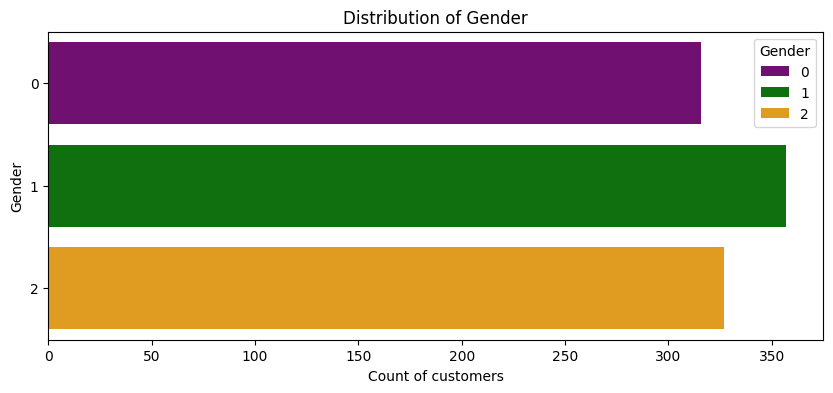

In [93]:
plt.figure(figsize=(10, 4))
sns.countplot(y='gender', data=customer_segmentation_df,hue='gender', palette=['purple', 'green', 'orange'], legend=True)
plt.legend(title='Gender')
plt.xlabel('Count of customers')
plt.ylabel('Gender')
plt.title('Distribution of Gender')
plt.show()

**b. Preferred_category**

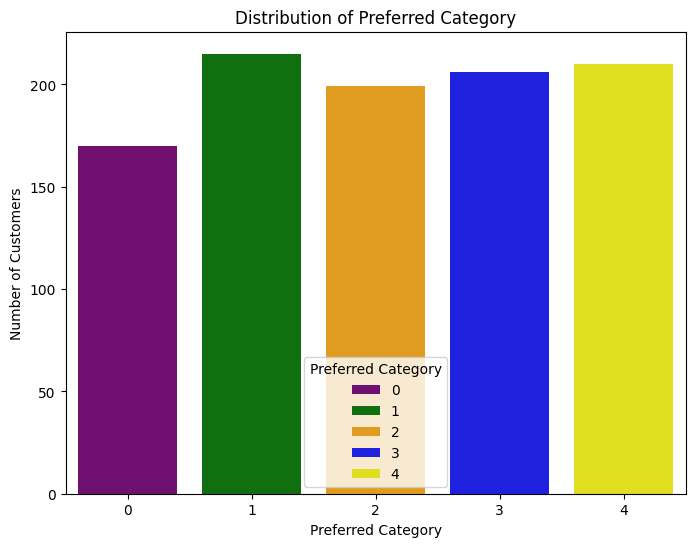

In [ ]:
# Count the occurrences of each preferred category
preferred_category_counts = customer_segmentation_df['preferred_category'].value_counts()

# Define colors
colors = ['purple', 'green', 'orange', 'blue', 'yellow']

plt.figure(figsize=(8, 6))
sns.barplot(x=preferred_category_counts.index, y=preferred_category_counts.values, palette=colors, hue=preferred_category_counts.index)
plt.xlabel("Preferred Category")
plt.ylabel("Number of Customers")
plt.title("Distribution of Preferred Category")
plt.legend(title='Preferred Category')
plt.show()


# Interpretation:
 **1. Popularity Trends:**

- Customers show a clear preference for Electronics, Home & Garden, and Sports.
- These categories could indicate key areas of interest for the customer base and warrant increased stocking and marketing efforts.

 **2. Underperforming Categories:**

- Clothing and Groceries are less preferred, suggesting a possible mismatch between the product offerings and customer needs or preferences in these categories.
- Investigating reasons (e.g., pricing, quality, or availability) for the lower preference for these categories could lead to improvements.
***3. Strategic Actions:***

- Focus promotions, discounts, and advertisements on Electronics, Home & Garden, and Sports to capitalize on their popularity.
- Perform targeted customer surveys or analyze sales data for Clothing and Groceries to identify factors contributing to their lower popularity.


**NUMERICAL FEATURES**


a 2x3 grid of subplots to visualize the distribution of various numerical features in a histogram format with kernel density estimation (KDE) overlaid.

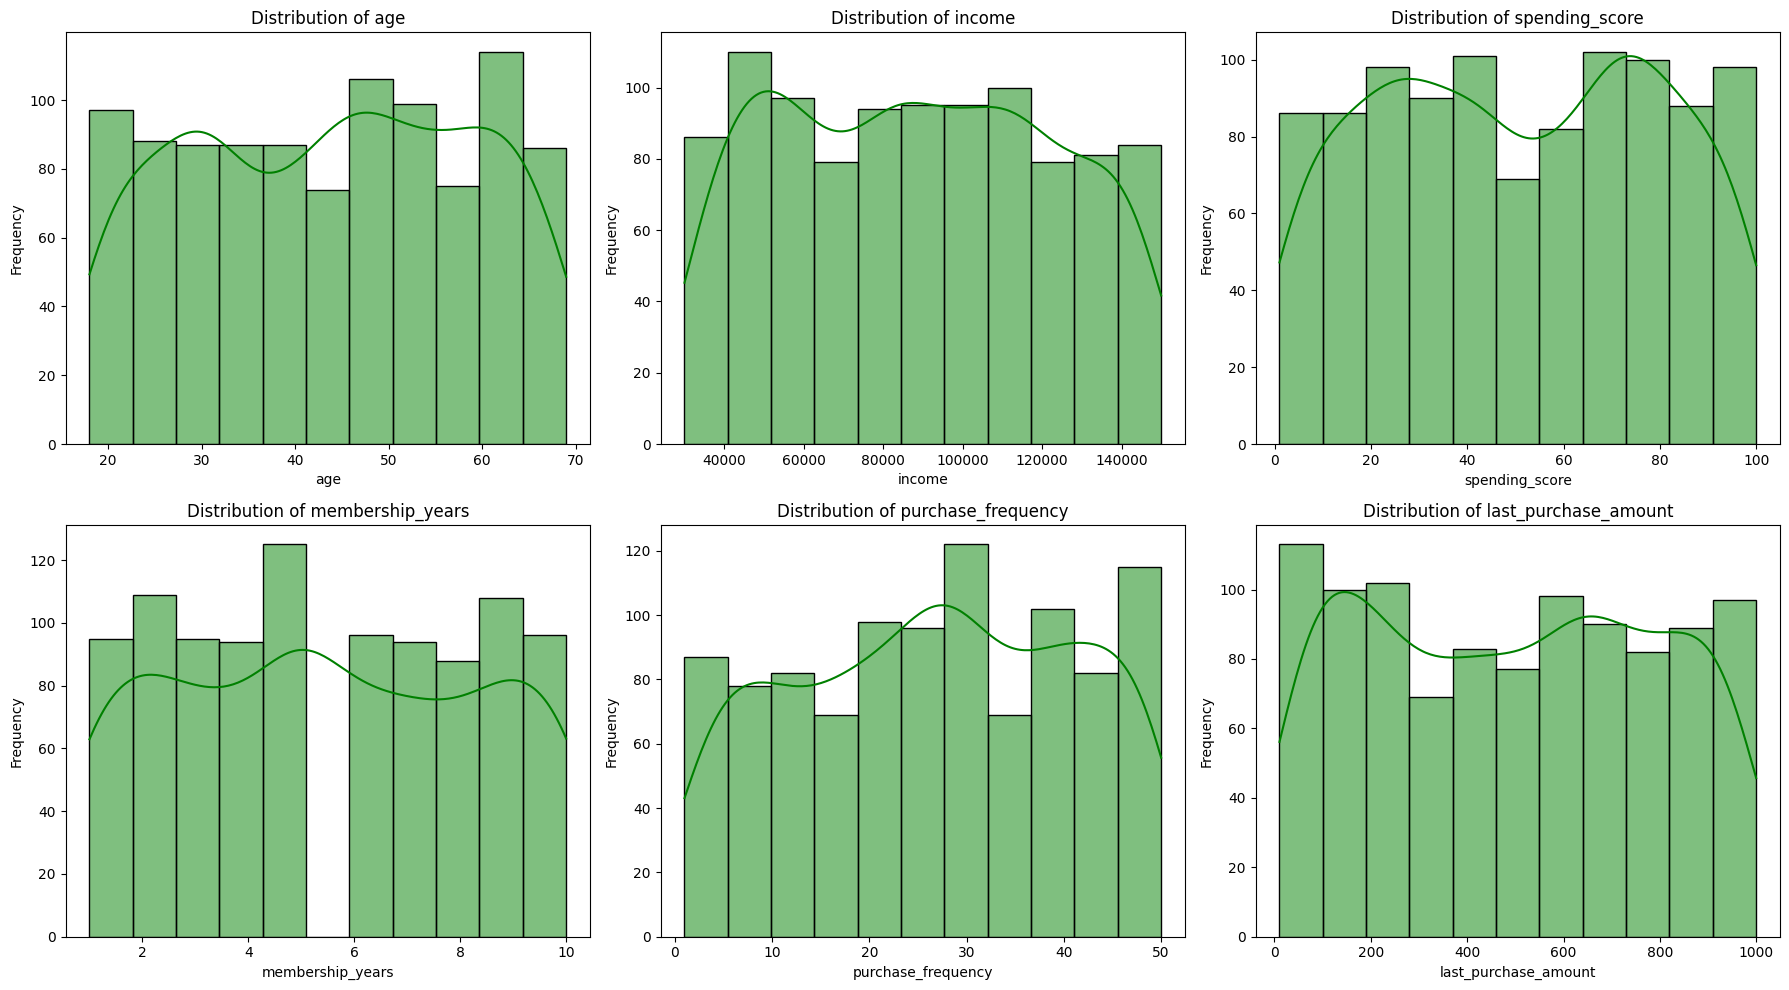

In [ ]:
numeric_columns = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

color = 'green'

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(numeric_columns):
    sns.histplot(customer_segmentation_df[col], kde=True, ax=axes[i // 3, i % 3], color=color)
    axes[i // 3, i % 3].set_title(f'Distribution of {col}')
    axes[i // 3, i % 3].set_xlabel(col)
    axes[i // 3, i % 3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Age: Relatively uniform distribution with peaks at around 40 and 60 years.
2. Income: Evenly distributed with slight peaks near higher income levels.
3. Spending Score: Balanced distribution, with no clear peaks, showing diverse spending habits.
4. Membership Years: Peaks at certain points (e.g., 4 and 8 years), indicating specific durations of customer loyalty.
5. Purchase Frequency: Evenly distributed, with a peak at around 30 purchases.
6. Last Purchase Amount: Fairly uniform distribution with peaks at both lower and higher amounts.

 A heatmap correlation showing the relationships between features  

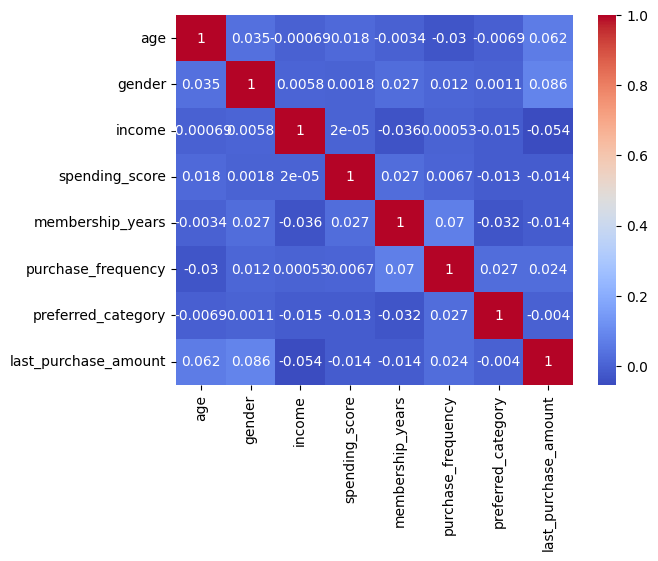

In [ ]:
sns.heatmap(customer_segmentation_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# bar visualizing the number of customers in different age groups

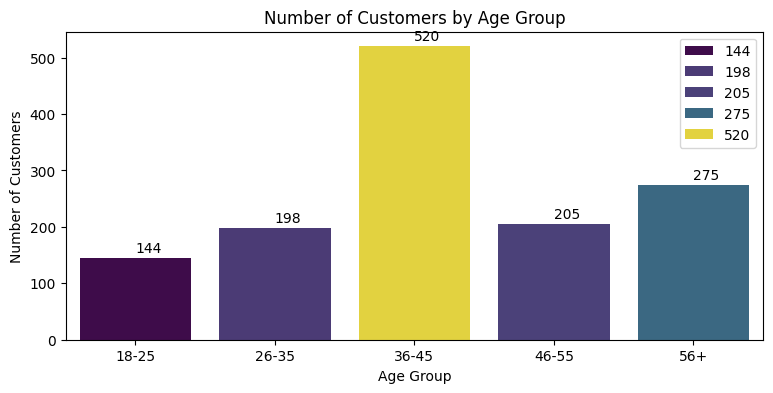

In [95]:
age_18_25 = customer_segmentation_df[(customer_segmentation_df['age'] >= 18) & (customer_segmentation_df['age'] <= 25)]
age_26_35 = customer_segmentation_df[(customer_segmentation_df['age'] >= 26) & (customer_segmentation_df['age'] <= 35)]
age_36_45 = customer_segmentation_df[(customer_segmentation_df['age'] >= 18) & (customer_segmentation_df['age'] <= 45)]
age_46_55 = customer_segmentation_df[(customer_segmentation_df['age'] >= 46) & (customer_segmentation_df['age'] <= 55)]
age_56_above = customer_segmentation_df[customer_segmentation_df['age'] >= 56]

age_x = ['18-25', '26-35', '36-45', '46-55', '56+']
age_y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_56_above.values)]

plt.figure(figsize=(9, 4))
barplot = sns.barplot(x=age_x, y=age_y, palette='viridis', hue= age_y )
plt.title('Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
for i, value in enumerate(age_y):
    barplot.text(i, value + 10, str(value) )


# Interpretation:

- The age group 36-45 appears to dominate the customer base, suggesting that this age range might be the most active or engaged segment in this business.
- The smaller presence of younger age groups may suggest limited outreach or interest among them.
# Conclusion:

- Future marketing and customer engagement strategies could focus more on the age group 36-45, as they are the most significant contributors.
- If the goal is to expand the younger audience, targeted campaigns might be necessary.

# a scatter plot showing a linear relationship between income and spending_score

Text(5.069444444444445, 0.5, 'Spending Score')

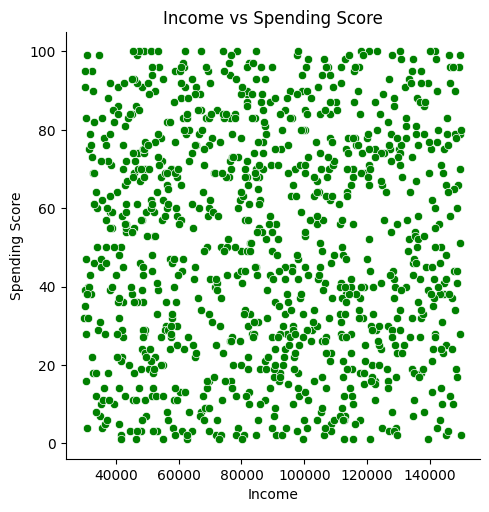

In [ ]:
sns.relplot(x= 'income', y= 'spending_score', data=customer_segmentation_df, color='green')
plt.title('Income vs Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')

- Customers with high incomes don’t necessarily have higher spending scores, and vice versa.
- This could suggest that spending habits are influenced by other factors


# bars showing the number of customers divided into different spending score ranges

Text(0, 0.5, 'Number of Customers')

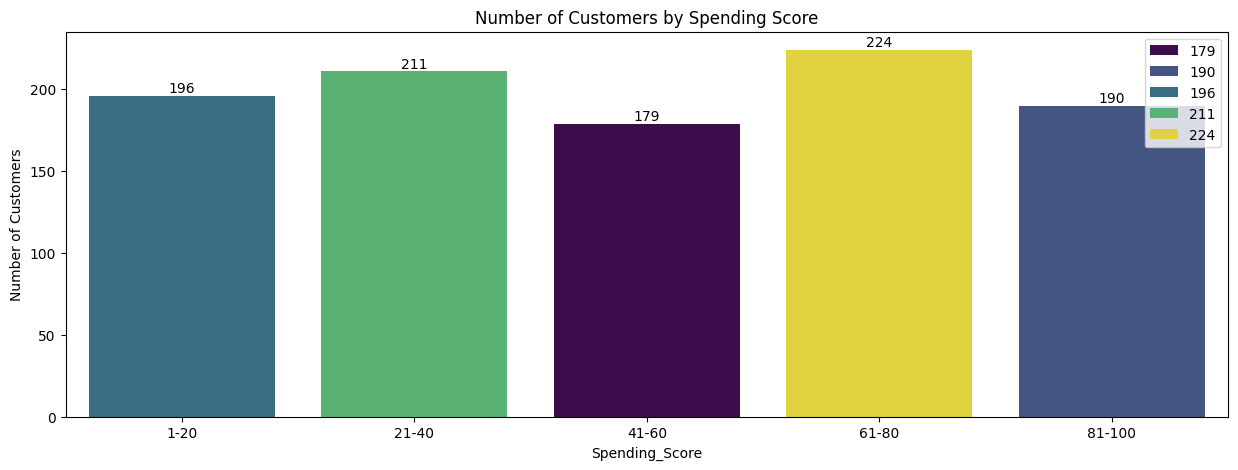

In [ ]:
ss_1_20 = customer_segmentation_df['spending_score'][(customer_segmentation_df['spending_score'] >= 1) & (customer_segmentation_df['spending_score'] <= 20)]
ss_21_40 = customer_segmentation_df['spending_score'][(customer_segmentation_df['spending_score'] >= 21) & (customer_segmentation_df['spending_score'] <= 40)]
ss_41_60 = customer_segmentation_df['spending_score'][(customer_segmentation_df['spending_score'] >= 41) & (customer_segmentation_df['spending_score'] <= 60)]
ss_61_80 = customer_segmentation_df['spending_score'][(customer_segmentation_df['spending_score'] >= 61) & (customer_segmentation_df['spending_score'] <= 80)]
ss_81_100 = customer_segmentation_df['spending_score'][(customer_segmentation_df['spending_score'] >= 81) & (customer_segmentation_df['spending_score'] <= 100)]

ss_x = ['1-20', '21-40', '41-60', '61-80', '81-100']
ss_y = len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)

plt.figure(figsize=(15, 5))
barplot = sns.barplot(x=ss_x, y=ss_y, palette='viridis', hue= ss_y )

# Adding data labels
for i, value in enumerate(ss_y):
    barplot.text(i, value + 2, str(value), ha="center", fontsize=10)

plt.title('Number of Customers by Spending Score')
plt.xlabel('Spending_Score')
plt.ylabel('Number of Customers')


- Products or services catering to the 61-80 spending score segment could yield better sales outcomes.
- Efforts can be directed at converting customers in the lower ranges (1-20) into higher spenders by introducing attractive deals or personalized offers.

# Bar showing the number of customers distributed across various income ranges

In [ ]:
print(customer_segmentation_df['income'].max())

print(customer_segmentation_df['income'].min())

149973
30004


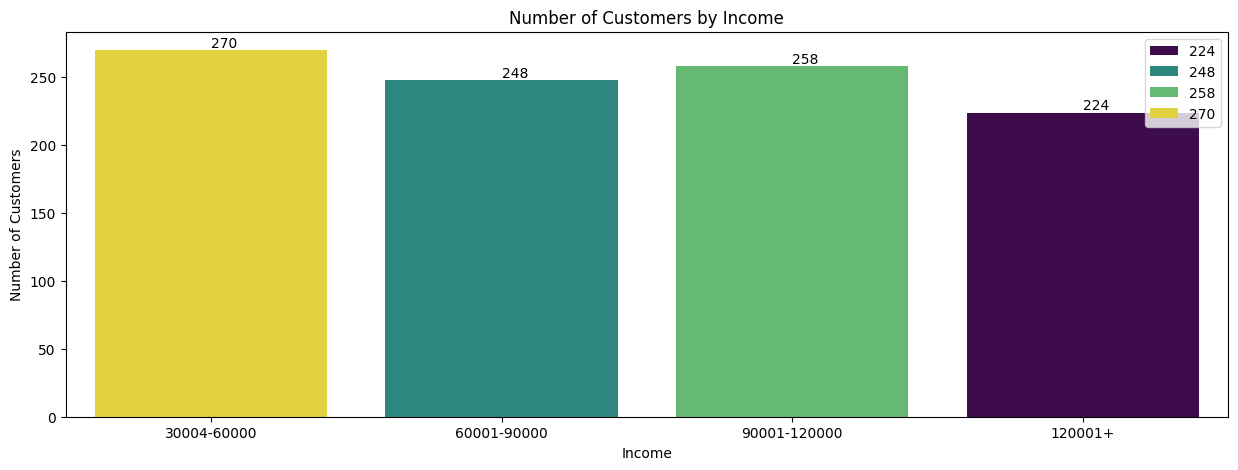

In [ ]:
#max = 149973 , min = 30004
income_30004_60000 = customer_segmentation_df['income'][(customer_segmentation_df['income'] >= 30004) & (customer_segmentation_df['income'] <= 60000)]
income_60001_90000 = customer_segmentation_df['income'][(customer_segmentation_df['income'] >=60001) & (customer_segmentation_df['income'] <= 90000)]
income_90001_120000 = customer_segmentation_df['income'][(customer_segmentation_df['income'] >= 90001) & (customer_segmentation_df['income'] <= 120000)]
income_120001_above = customer_segmentation_df['income'][(customer_segmentation_df['income'] >= 120001)]

income_x = [ '30004-60000', '60001-90000', '90001-120000', '120001+']
income_y = [len( income_30004_60000.values), len(income_60001_90000 .values), len(income_90001_120000), len(income_120001_above.values)]

plt.figure(figsize=(15, 5))
barplot = sns.barplot(x=income_x, y=income_y,palette='viridis', hue= income_y    )

# Adding data labels
for i, value in enumerate(income_y):
    barplot.text(i, value + 2, str(value), fontsize=10)

plt.title('Number of Customers by Income')
plt.xlabel('Income')
plt.ylabel('Number of Customers')

plt.show()

**Interpretation:**

- Most customers are in the mid to lower-income brackets.
Higher income customers (120,001+) might represent a niche segment.

**Conclusion:**

- The business could benefit from products or services tailored to mid to lower-income groups, which constitute the majority

# The distribution of customers based on the number of membership years

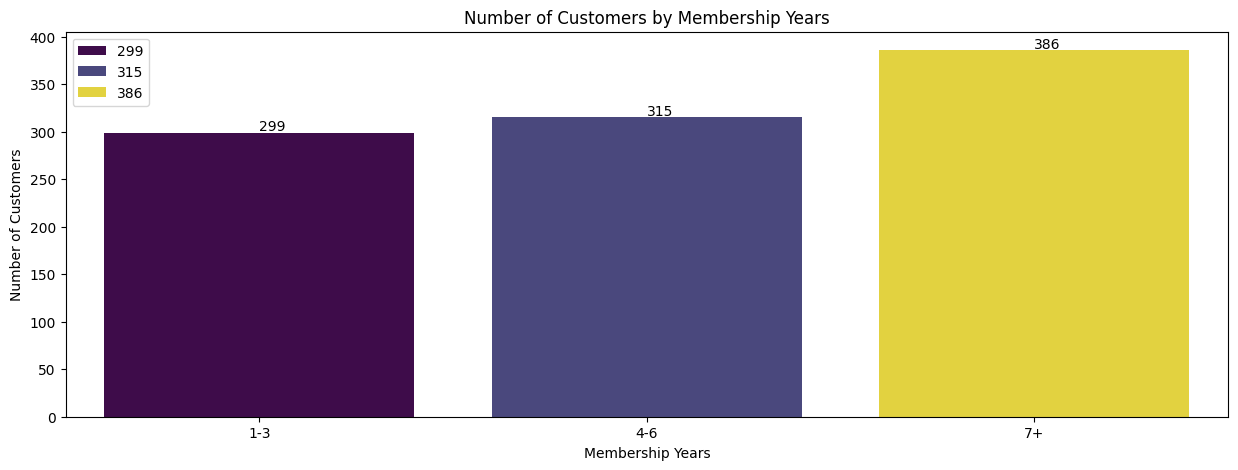

In [ ]:
 #membership_years
m_1_3 = customer_segmentation_df['membership_years'][(customer_segmentation_df ['membership_years']>=1) & (customer_segmentation_df ['membership_years'] <= 3)]
m_4_6 = customer_segmentation_df['membership_years'][(customer_segmentation_df ['membership_years']>=4) & (customer_segmentation_df ['membership_years'] <= 6)]
m_7_above = customer_segmentation_df['membership_years'][(customer_segmentation_df ['membership_years']>=7)]

m_x = ['1-3', '4-6', '7+']
m_y = [len(m_1_3.values), len(m_4_6.values), len(m_7_above.values)]

plt.figure(figsize=(15, 5))
barplot = sns.barplot(x=m_x, y=m_y, palette='viridis', hue= m_y )

# Adding data labels
for i, value in enumerate(m_y):
    barplot.text(i, value + 2, str(value), fontsize=10)

plt.title('Number of Customers by Membership Years')
plt.xlabel('Membership Years')
plt.ylabel('Number of Customers')

plt.show()



**Observations:**

- Customers with 7+ years of membership are the largest group (386).
- Those with 1-3 years of membership form the smallest group (299).
- Membership longevity generally correlates with higher customer numbers.

**Conclusion:**  

- Focus on improving new customer acquisition strategies while maintaining loyalty programs for long-term customers.


# The distribution of customers based on their purchase frequency.

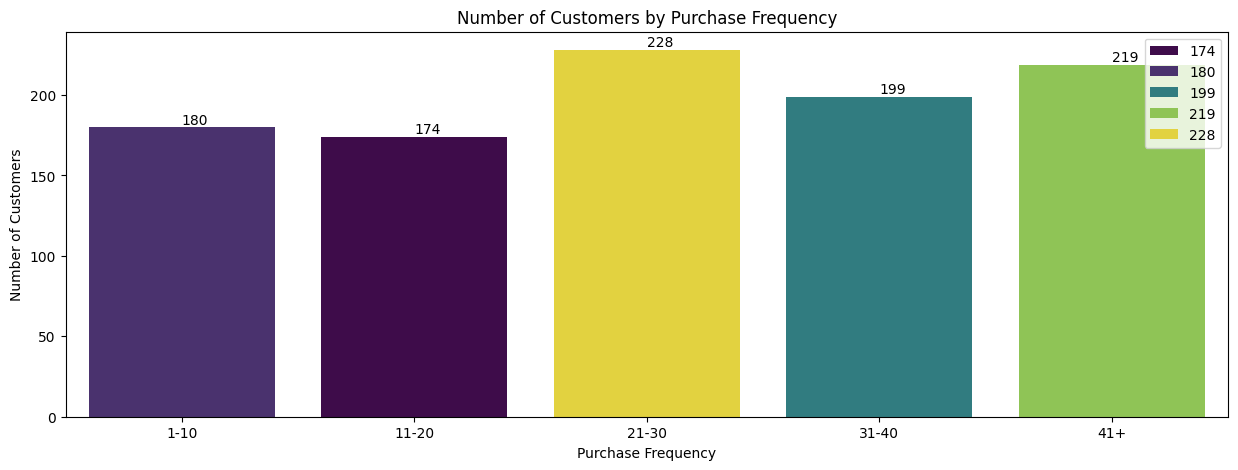

In [ ]:
#purchase_frequency
p_1_10 = customer_segmentation_df['purchase_frequency'][(customer_segmentation_df['purchase_frequency'] >=1) & (customer_segmentation_df['purchase_frequency'] <= 10)]
p_11_20 = customer_segmentation_df['purchase_frequency'][(customer_segmentation_df['purchase_frequency'] >=11) & (customer_segmentation_df['purchase_frequency'] <= 20)]
p_21_30 = customer_segmentation_df['purchase_frequency'][(customer_segmentation_df['purchase_frequency'] >=21) & (customer_segmentation_df['purchase_frequency'] <= 30)]
p_31_40 = customer_segmentation_df['purchase_frequency'][(customer_segmentation_df['purchase_frequency'] >=31) & (customer_segmentation_df['purchase_frequency'] <= 40)]
p_41_above = customer_segmentation_df['purchase_frequency'][(customer_segmentation_df['purchase_frequency'] >=41)]

p_x = ['1-10', '11-20', '21-30', '31-40', '41+']
p_y = [len(p_1_10.values), len(p_11_20.values), len(p_21_30.values), len(p_31_40.values), len(p_41_above.values)]

plt.figure(figsize=(15, 5))
barplot = sns.barplot(x=p_x, y=p_y, palette='viridis', hue= p_y )

# Adding data labels
for i, value in enumerate(p_y):
    barplot.text(i, value + 2, str(value), fontsize=10)

plt.title('Number of Customers by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')

plt.show()

**Observations:**

- Customers purchasing 21-30 times are the largest group (228).
- Those with 1-10 purchases are the smallest group (180).
- Increasing purchase frequency in lower groups (1-10) can drive overall sales.

**Conclusion:**

- Incentives for lower-frequency purchasers could encourage them to buy more often, aligning them with the higher-frequency groups.

# **5. K-MEANS CLUSTERING**

In [96]:
#scale the numerical features first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
# Fit the scaler to the numeric columns and transform
customer_segmentation_df[numeric_columns] = scaler.fit_transform(customer_segmentation_df[numeric_columns])

print(customer_segmentation_df.head())



        age  gender    income  spending_score  membership_years  \
0 -0.384644       0  0.316868        1.358468         -0.865010   
1 -1.515362       0 -0.282016        0.321865         -1.215358   
2  1.078639       0  1.112778       -0.714738         -1.215358   
3 -0.251618       2 -1.210096        0.805613          1.237080   
4  1.411203       0  1.523374       -1.025718         -0.865010   

   purchase_frequency  preferred_category  last_purchase_amount  
0           -0.182348                   2             -1.281540  
1            1.082005                   4             -1.523763  
2            0.098620                   0             -0.230005  
3           -1.516943                   3              1.690080  
4           -0.112106                   1             -0.491443  


# Clusters based on age and spending_score

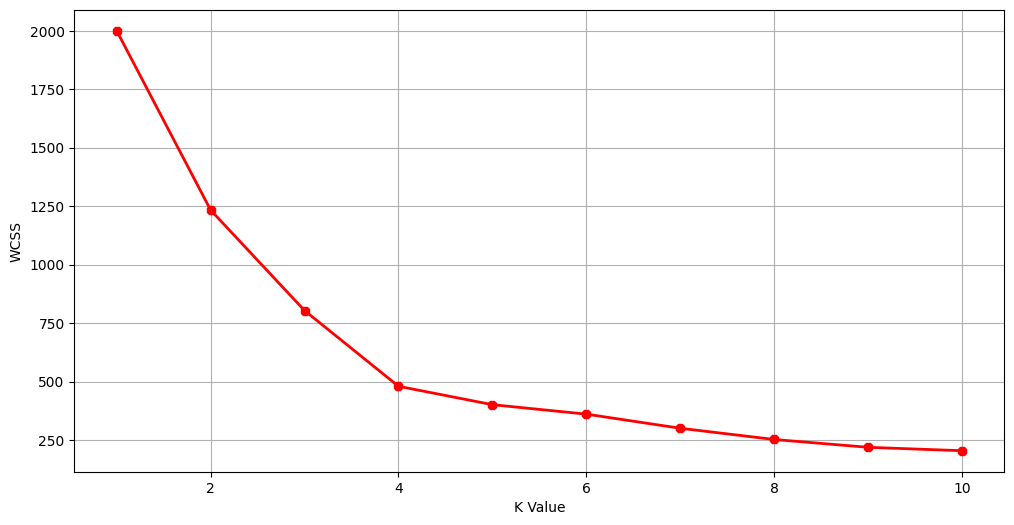

In [54]:
#x1 = customer_segmentation_df.loc[:, ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].values
x1 = customer_segmentation_df.loc[:, ['age','spending_score']].values
from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
  Kmeans = KMeans(n_clusters=k, init='k-means++' )
  Kmeans.fit(x1)
  wcss.append(Kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


- The plot visualizes how the WCSS (Within-Cluster Sum of Squares) changes with different numbers of clusters (k). A lower WCSS indicates a better clustering solution, meaning the data points are closer to their respective cluster centers.

- The elbow point is where clustering stops giving significant improvements in compactness, making it the most efficient choice for the number of clusters.








In [55]:
KMeans = KMeans(n_clusters=4 )
label = KMeans.fit_predict(x1)
print(label)

[3 3 0 3 0 1 3 3 0 2 1 2 3 0 1 0 0 1 3 3 1 3 3 3 2 3 0 1 3 1 1 2 1 3 2 1 2
 2 1 1 1 2 1 3 0 0 0 2 3 2 2 3 2 3 2 3 0 0 0 1 1 3 0 0 1 3 3 3 3 0 3 0 1 3
 2 2 0 1 1 2 2 3 3 2 1 1 0 1 1 2 1 3 2 0 3 1 0 2 1 3 1 3 1 0 1 0 3 2 2 2 1
 2 0 1 0 2 0 0 3 0 0 3 1 3 2 3 2 3 2 0 2 2 3 3 3 1 0 2 1 3 3 1 2 3 0 0 0 2
 3 0 2 0 3 1 2 3 2 0 2 1 0 2 2 0 0 1 3 3 2 3 1 1 2 2 3 3 0 2 2 0 2 1 3 1 3
 3 1 0 2 3 3 0 0 2 2 0 3 3 0 0 0 1 0 2 3 1 2 2 0 0 3 1 0 1 2 1 0 0 2 2 2 0
 0 0 0 1 2 0 3 0 1 0 1 1 1 3 0 0 0 0 3 3 1 2 1 0 0 3 2 2 0 3 0 2 3 2 1 3 2
 3 3 0 2 2 2 2 0 1 3 3 0 0 2 2 3 1 0 0 2 2 0 1 1 0 0 2 3 2 3 3 0 2 2 0 3 0
 1 1 0 0 0 0 0 2 1 2 3 0 0 0 0 1 0 3 0 1 3 1 2 1 0 0 0 1 3 2 0 3 2 3 3 3 1
 0 2 3 2 3 3 0 1 2 3 1 1 0 1 3 0 0 0 2 2 2 3 3 0 0 0 3 3 1 1 2 1 3 2 2 0 3
 3 3 3 2 1 1 2 2 3 2 2 0 0 0 3 2 0 1 3 3 2 3 2 2 0 0 1 0 1 3 3 2 1 1 1 1 3
 3 2 1 3 0 1 0 2 3 0 0 0 2 2 0 0 0 3 3 0 0 1 2 3 3 3 2 3 2 0 0 2 3 0 1 2 0
 2 0 3 3 0 0 3 0 3 1 3 0 1 2 3 2 3 2 0 2 0 0 1 2 3 2 3 1 0 2 1 1 0 0 0 3 0
 2 3 1 2 2 3 2 1 1 3 3 2 

In [56]:
print(KMeans.cluster_centers_)

[[ 0.75106303 -0.89725363]
 [-1.03617403 -0.82530847]
 [ 0.88468733  0.86780918]
 [-0.80951153  0.8978495 ]]


Text(0, 0.5, 'spending_score')

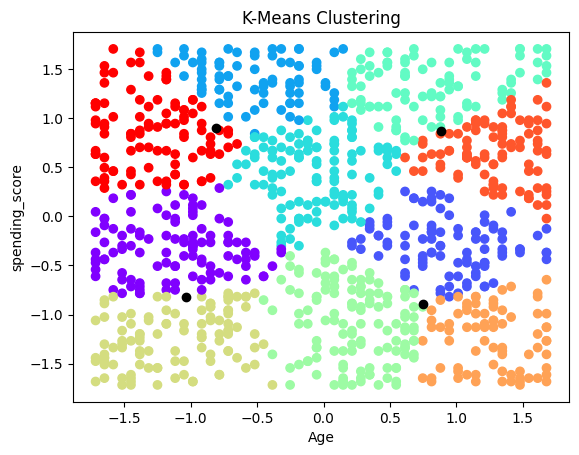

In [57]:
plt.scatter(x1[:,0], x1[ :, 1],  c= Kmeans.labels_, cmap= 'rainbow')
plt.scatter(KMeans.cluster_centers_[:,0], KMeans.cluster_centers_[:,1], color='black')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel( 'spending_score')

- The chart reveals distinct spending behaviors segmented by age. Businesses can target younger, high-spending clusters with tailored marketing strategies, while identifying opportunities to engage lower-spending clusters.



# Clusters based on income and spending_score

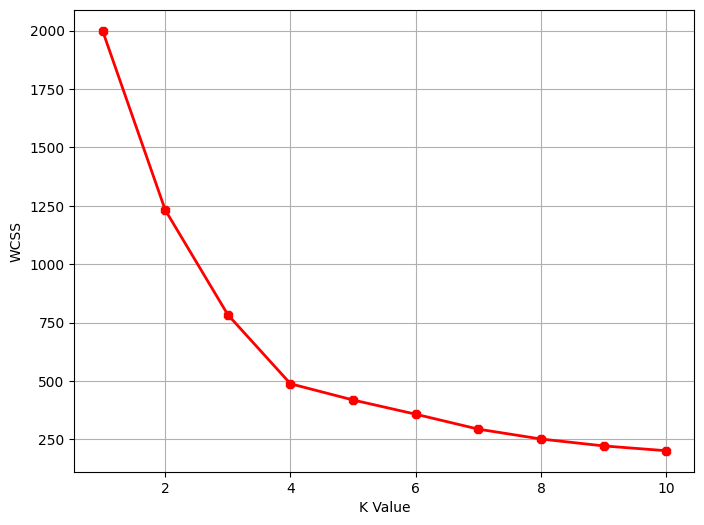

In [104]:
#x1 = customer_segmentation_df.loc[:, ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].values
x2 = customer_segmentation_df.loc[:, [ 'income','spending_score' ]].values
from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
  Kmeans = KMeans(n_clusters=k, init='k-means++' )
  Kmeans.fit(x2)
  wcss.append(Kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [105]:
KMeans = KMeans(n_clusters=4 )
label = KMeans.fit_predict(x2)
print(label)

[2 1 0 1 0 3 1 2 3 1 3 1 1 3 0 0 0 3 2 2 3 1 1 1 1 2 3 3 1 0 3 1 3 1 1 3 2
 1 3 0 3 2 3 1 3 0 0 1 1 2 1 2 2 1 1 1 3 0 3 0 3 1 1 3 0 2 2 1 2 3 1 3 0 2
 2 2 3 3 0 1 2 2 2 1 0 3 3 3 0 1 0 2 1 0 1 0 0 1 0 1 0 1 1 0 3 0 1 1 1 1 0
 1 3 3 0 2 0 3 2 3 0 1 3 1 1 1 1 1 1 0 1 2 2 1 2 0 1 2 0 1 1 3 2 1 0 0 0 2
 1 0 2 3 1 3 2 2 1 3 2 3 0 2 1 0 0 3 1 1 1 1 0 0 2 1 1 1 0 2 2 0 1 0 1 3 2
 2 0 3 2 1 2 0 3 1 1 0 1 2 3 0 0 3 0 0 2 0 1 1 0 0 1 3 0 3 2 0 3 0 1 2 1 3
 0 3 0 3 1 3 1 3 0 0 0 0 3 1 3 0 0 0 3 2 0 2 0 3 3 1 2 0 0 2 0 2 2 1 0 1 1
 1 2 3 2 1 2 1 0 0 2 1 3 0 1 2 2 3 0 3 2 1 3 3 0 3 0 2 2 2 1 1 3 1 1 0 2 0
 0 0 3 0 0 0 3 1 3 1 2 3 0 0 0 0 3 2 3 3 2 3 1 3 3 0 3 0 1 1 3 1 1 1 2 1 0
 0 2 2 1 2 2 3 3 1 1 0 0 0 3 2 3 0 0 1 2 1 1 2 0 0 3 1 2 0 2 2 0 2 1 2 3 1
 1 1 1 1 3 3 2 2 1 2 2 0 0 0 1 2 0 0 2 1 2 1 2 1 0 0 3 3 3 2 1 2 0 3 3 0 2
 2 1 0 1 3 0 0 1 1 0 0 3 1 1 3 0 0 1 2 3 0 3 2 2 2 2 1 1 2 3 0 2 2 1 3 2 3
 1 3 1 1 3 3 2 0 1 0 2 3 0 1 2 2 2 1 3 2 3 0 0 1 2 2 1 3 0 2 0 0 0 0 0 1 0
 2 1 3 1 2 2 2 0 0 1 1 2 

In [106]:
print(KMeans.cluster_centers_)

[[ 0.81708823 -0.83748325]
 [-0.78682976  0.83046724]
 [ 0.94585122  0.92655   ]
 [-0.92968838 -0.92268064]]


Text(0, 0.5, ' spending_score')

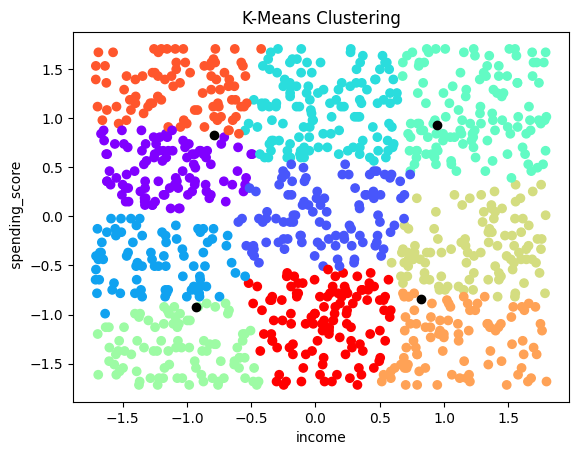

In [107]:
plt.scatter(x2[:,0], x2[ :, 1],  c= Kmeans.labels_, cmap= 'rainbow')
plt.scatter(KMeans.cluster_centers_[:,0], KMeans.cluster_centers_[:,1], color='black')
plt.title('K-Means Clustering')
plt.xlabel('income' )
plt.ylabel(' spending_score')

- High-income customers are clustered separately, and their spending scores vary, suggesting mixed behavior in terms of how income impacts spending.
- Mid- and low-income customers form separate clusters, some of which exhibit moderate spending patterns.

**conclusion:**

- Income is a strong factor in customer segmentation, with high-income groups showing diverse spending behaviors. This segmentation can guide premium product targeting for high-income customers and cost-effective solutions for lower-income groups.



# clusters based on purchase_frequency and last_purchase_amount

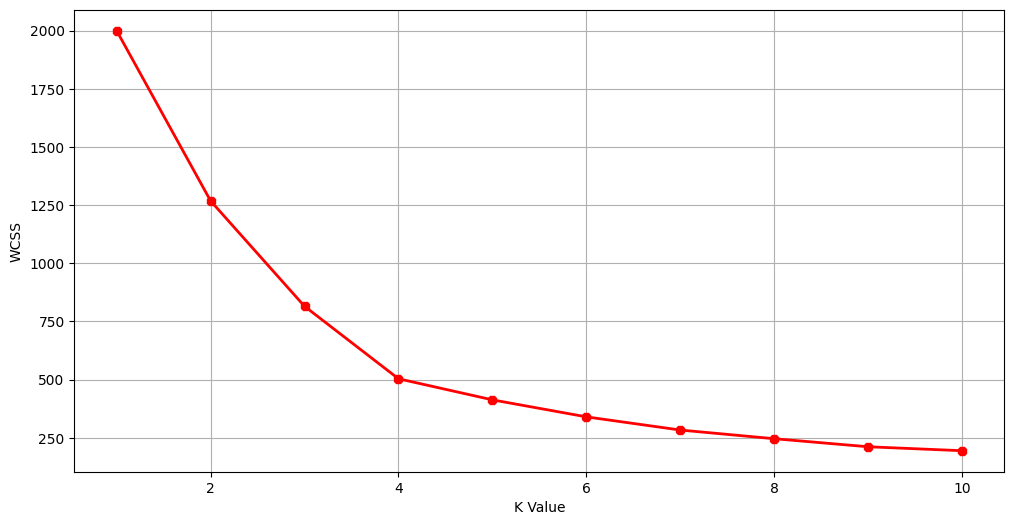

In [72]:
x3 = customer_segmentation_df.loc[:, [  'purchase_frequency' , 'last_purchase_amount']].values
from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
  Kmeans = KMeans(n_clusters=k, init='k-means++' )
  Kmeans.fit(x3)
  wcss.append(Kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [73]:
KMeans = KMeans(n_clusters=4 )
label = KMeans.fit_predict(x3)
print(label)

[2 0 0 1 2 0 0 3 1 1 2 3 0 2 1 0 2 3 2 2 1 3 1 2 3 0 2 3 2 1 3 2 0 0 3 1 0
 3 0 0 3 0 0 3 3 0 2 2 2 1 0 3 1 0 3 1 2 1 1 2 2 0 1 2 2 3 2 0 2 3 2 3 1 2
 0 3 3 2 2 3 3 2 2 0 2 0 3 0 1 1 0 3 2 2 1 2 1 3 3 0 2 0 3 2 3 3 3 1 0 3 3
 1 2 0 2 0 3 3 3 3 1 2 0 1 1 0 2 0 1 3 3 0 3 2 3 0 0 1 2 2 3 0 1 2 1 1 3 1
 2 0 2 2 3 1 3 1 3 2 1 0 1 1 0 3 0 3 2 2 0 3 0 3 3 1 2 1 0 0 0 3 2 1 0 0 0
 0 2 2 3 2 0 0 0 3 2 0 3 2 2 2 3 3 2 0 3 1 0 2 3 2 2 0 3 3 0 3 3 2 1 3 0 1
 3 2 2 0 3 2 3 2 0 2 0 2 2 3 1 1 3 3 2 1 3 1 1 0 2 0 3 2 0 3 2 3 2 2 3 1 0
 1 0 3 3 1 3 1 1 3 0 0 1 2 1 3 1 0 1 1 3 1 3 1 3 0 0 0 2 0 3 1 3 1 3 3 1 0
 2 0 0 1 2 2 3 3 1 0 2 3 2 0 2 3 0 3 2 3 1 1 1 0 0 2 3 3 0 3 3 3 2 0 3 3 2
 2 0 1 0 3 0 0 1 3 0 0 1 2 2 0 1 2 0 2 3 1 2 3 0 1 1 3 3 3 3 1 2 3 1 0 3 3
 2 2 3 0 3 0 1 0 2 2 3 2 0 0 1 3 1 3 0 1 1 2 1 2 3 3 3 2 3 1 1 2 0 2 1 1 1
 3 1 3 2 1 2 1 3 1 1 3 3 3 3 2 0 2 0 1 1 3 2 2 2 3 3 3 1 2 1 0 1 3 0 0 0 0
 0 0 3 2 2 3 0 0 2 3 2 1 0 2 1 1 1 1 3 2 2 2 3 3 3 0 3 3 3 0 3 0 0 1 2 2 0
 0 3 2 3 2 0 1 2 3 2 3 1 

In [75]:
print(KMeans.cluster_centers_)

[[ 0.79752581 -0.94036558]
 [-0.89848005  0.95377186]
 [-0.93939871 -0.83786269]
 [ 0.78524527  0.79374848]]


Text(0, 0.5, 'last_purchase_amount')

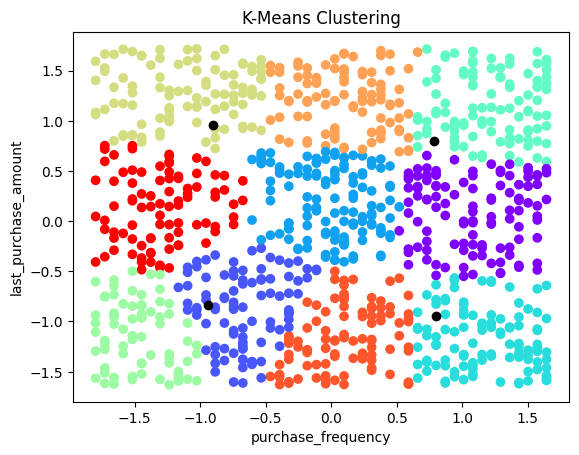

In [76]:
plt.scatter(x3[:,0], x3[ :, 1],  c= Kmeans.labels_, cmap= 'rainbow')
plt.scatter(KMeans.cluster_centers_[:,0], KMeans.cluster_centers_[:,1], color='black')
plt.title('K-Means Clustering')
plt.xlabel('purchase_frequency'  )
plt.ylabel('last_purchase_amount')

- Customers with high purchase frequency and higher last purchase amounts are grouped together, potentially indicating loyal or premium customers.
- Clusters with low purchase frequency and low purchase amounts might represent occasional or low-value customers.

**Conclusion:**
 - This segmentation highlights customer purchase behavior. Businesses can use this information to reward frequent, high-value purchasers with loyalty programs and target occasional buyers with promotions to increase their engagement.

# **7. INSIGHTS AND RECOMMENDATIONS**


**1. Targeting Younger vs. Older Customers**

- For younger customers (18-35): Focus on digital and trend-driven campaigns, offering gamified loyalty programs, and exclusive online promotions.
- For older customers (56+): Introduce classic, value-driven products and senior-friendly services, along with personalized customer care for loyalty programs.

**2. Addressing High vs. Low-Income Groups**

- High-income customers: Provide premium and luxury products, while offering targeted promotions for lower-spending high-income individuals to enhance engagement.
- Mid- and low-income groups: Implement cost-effective solutions such as bundles, discounts, and installment payment options to increase spending.

**3. Engaging Frequent vs. Infrequent Buyers**

- Frequent buyers: Develop tiered loyalty programs with exclusive benefits, early access, and personalized rewards.
- Infrequent buyers: Utilize targeted campaigns with incentives like discounts, free trials, and personalized product recommendations to encourage more frequent purchases.

**4. Focusing on Age Groups**

- For the 36-45 age group: Use loyalty programs and exclusive discounts to retain and engage further.
- For younger (18-25) and older (56+) age groups: Expand digital engagement and offer products tailored to specific needs or values.

**5. Income vs. Spending Behavior**

- Develop segmented strategies for high-income customers focused on premium offerings. For lower-income segments, emphasize quality and emotional appeal rather than price alone.

**6. Spending Score Segmentation**

- Focus on converting low spenders (1-20) with entry-level promotions, while enhancing engagement for moderate spenders (61-80) through tiered rewards and incremental spending opportunities.

**7. Membership Retention**

- Enhance onboarding and rewards for new members (1-3 years) to improve retention, while continuing to offer exclusive benefits and incentives for long-term members (7+ years).

**8. Boosting Purchase Frequency**

- Introduce tiered loyalty programs for customers with varying purchase frequencies. Use personalized campaigns for low-frequency buyers to increase engagement and encourage repeat purchases.
